In [1]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

tf.config.set_visible_devices([], 'GPU')

#Définition de la longueur et de la largeur de l'image
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

#Chargement des images
observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')

2025-11-17 21:56:47.149624: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-17 21:56:47.183178: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-17 21:56:48.035486: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-17 21:56:48.155968: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


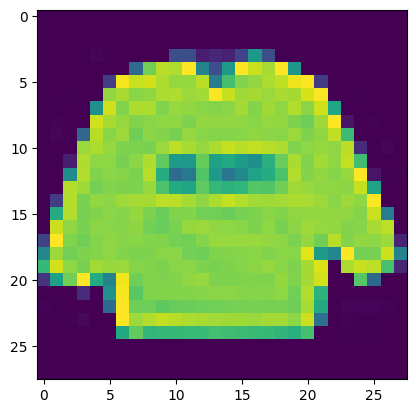

In [2]:
#On exclut la première colonne (les labels) pour constituer un tableau de pixels
X = np.array(observations_entrainement.iloc[:, 1:])

premiereImage = X[0]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE,LARGEUR_IMAGE])
plt.imshow(premiereImage)
plt.show()

In [3]:
#On crée des catégories à l'aide du module Keras
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:,0]))
#Répartition des données d'entrainement en données d'apprentissage et données de validation
#80% de donnée d'apprentissage et 20% de donnée de validation
X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)

In [4]:
# On redimensionne les images au format 28*28 et on réalise un scaling sur les données des pixels
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], 
                                          LARGEUR_IMAGE, 
                                          LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255

X_validation = X_validation.reshape(X_validation.shape[0], 
                                    LARGEUR_IMAGE, 
                                    LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255

In [5]:
#Preparation des données de tests
observations_test = pnd.read_csv('datas/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:, 0]))
X_test = X_test.reshape(X_test.shape[0], 
                        LARGEUR_IMAGE, 
                        LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

# On spécifie les dimensions de l'image d'entrée
dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

# On crée le réseau de neurones couche par couche
reseauNeurone1Convolution = Sequential()

# Ajout de la couche d'entrée
reseauNeurone1Convolution.add(Input(shape=dimentionImage))

#1- Ajout de la couche de convolution comportant
# 32 filtres de de taille 3x3 (Kernel) parcourant l'image
# Une fonction d'activation de type ReLU (Rectified Linear Activation)
# Une image d'entrée de 28px * 28 px 
reseauNeurone1Convolution.add(Conv2D(32, 
                                     kernel_size=(3, 3), 
                                     activation='relu'))

#2- Définition de la fonction de pooling avec une fenêtre de 2px sur 2 px
reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2, 2)))

#3- Ajout d'une fonction d'ignorance
reseauNeurone1Convolution.add(Dropout(0.2))

#5 - On transforme en une seule ligne
reseauNeurone1Convolution.add(Flatten())

#6 - Ajout d'un réseau de neurones composé de 128 neurones avec 
# une fonction d'activation de type ReLU
reseauNeurone1Convolution.add(Dense(128, activation='relu'))

#7 - Ajout d'un réseau de neurones composé de 10 neurones avec une 
# fonction d'activation de type softmax
reseauNeurone1Convolution.add(Dense(10, activation='softmax'))

In [7]:
reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

In [8]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8098 - loss: 0.5532 - val_accuracy: 0.8587 - val_loss: 0.4021
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8759 - loss: 0.3555 - val_accuracy: 0.8787 - val_loss: 0.3543
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8886 - loss: 0.3126 - val_accuracy: 0.8942 - val_loss: 0.3083
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8986 - loss: 0.2871 - val_accuracy: 0.8867 - val_loss: 0.3213
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9057 - loss: 0.2649 - val_accuracy: 0.8979 - val_loss: 0.2880
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9102 - loss: 0.2488 - val_accuracy: 0.9018 - val_loss: 0.2791
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9126 - loss: 0.2394 - val_accuracy: 0.9047 - val_loss: 0.2611
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9207 - loss: 0.2224 - val_accu

In [9]:
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.24480408430099487
Précision: 0.9118000268936157


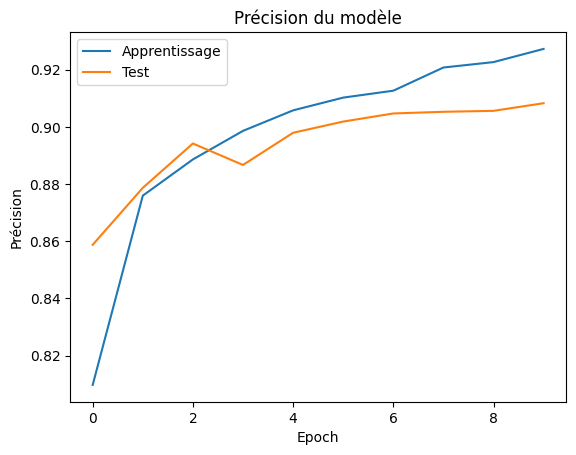

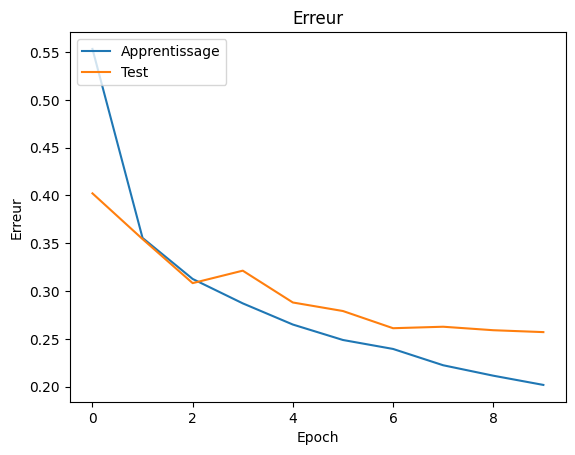

In [10]:
plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)

In [12]:
nouvelles_images_apprentissage = generateur_images.flow(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256)

nouvelles_images_validation = generateur_images.flow(
    X_validation, 
    y_validation,
    batch_size=256)

historique_apprentissage = reseauNeurone1Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.8267 - loss: 0.4653 - val_accuracy: 0.8449 - val_loss: 0.4157
Epoch 2/50
  1/187 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8047 - loss: 0.4940

/home/vscode/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8047 - loss: 0.4940 - val_accuracy: 0.8447 - val_loss: 0.4176
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8465 - loss: 0.4125 - val_accuracy: 0.8595 - val_loss: 0.3833
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8555 - loss: 0.4177 - val_accuracy: 0.8539 - val_loss: 0.3961
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8543 - loss: 0.3918 - val_accuracy: 0.8504 - val_loss: 0.3917
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8320 - loss: 0.4488 - val_accuracy: 0.8607 - val_loss: 0.3786
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8591 - loss: 0.3781 - val_accuracy: 0.8621 - val_loss: 0.3699
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8906 - loss: 0.3131 - val_accuracy: 0.8635 - val_loss: 0.3674
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.8668 - loss: 0.3617 - val_accuracy: 0.8708 - 

In [14]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurone1Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")

Modèle sauvegardé !
